In [40]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

In [41]:
samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

sample = samples[1]
sample_short = ''.join(sample.split('.')[:-1])
sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
sample_pool = sample.replace('-', '').replace('.', '')
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'


In [42]:
experiment_id = '427'

In [45]:
# Fasta file with the peptides and the metadata in the samples (longlist derived)
filter_fasta_long = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_query_peptides_kmers.fa'
print(filter_fasta_long)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07_query_peptides_kmers.fa


In [46]:
# the experiment/ peptide table 
sample_experiment_peptides = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_experiments_per_peptide.tsv'
print(sample_experiment_peptides)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07_experiments_per_peptide.tsv


In [47]:
### FIX ###
# Fasta file with the peptides and the metadata in the samples (longlist derived)
filter_fasta_long_with_flag = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_query_peptides_kmers_flag.fa'
print(filter_fasta_long)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07_query_peptides_kmers.fa


In [48]:
### SHORTCUT FOR ONE EXPERIMENT ### (Should use the experiment file to extract the name of the file)
# MHC File 
sample_MHC = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv'

# Process experiment outputs (fasta, MHC, experiment)

In [49]:
# Process the experiment/ peptide table file according to the experiment wanted 
downsample_pept_exp = []
with open(sample_experiment_peptides) as fp:
    for idx, line in enumerate(fp.readlines()):
        if idx:
            sample_peptide_id = line.split()[0]
            sample_experiment_ids = line.split()[2].split(';')
            if experiment_id in sample_experiment_ids:
                downsample_pept_exp.append(sample_peptide_id)
            
downsample_pept_exp = pd.DataFrame(downsample_pept_exp, columns = ['>pepID'])

In [50]:
len(downsample_pept_exp)

165876

In [51]:
# # Process the ORIGINAL flag file with the peptides and the metadata in the samples (longlist derived)
# # Downsample for the experiement of interest 

# samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
#         'TCGA-C8-A12P-01A-11R-A115-07.all', 
#         'TCGA-AO-A0JM-01A-21R-A056-07.all', 
#         'TCGA-A2-A0SX-01A-12R-A084-07.all',
#         'TCGA-A2-A0D2-01A-21R-A034-07.all']

# all_fasta = []

# for sample in samples:
#     sample_short = ''.join(sample.split('.')[:-1])
#     sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
#     sample_pool = sample.replace('-', '').replace('.', '')

#     meta = []
#     peptides = []
#     with open(filter_fasta_long) as fp:
#         for idx, line in enumerate(fp.readlines()):
#             #print(idx)
#             if idx == 0: 
#                 header = [field.split('-')[0] for field in line.replace('\n', '').split(';')]
#             if '>' in line:
#                 meta_fields = [field.split('-')[1] for field in line.replace('\n', '').split(';')]
#                 target_pep_id = meta_fields[0]
#                 meta.append(meta_fields)
#             elif ('>' not in line):
#                 peptides.append(line.replace('\n', ''))

#     df_filter_fasta_long = pd.DataFrame(meta)
#     df_filter_fasta_long['peptide'] = peptides #optional
#     df_filter_fasta_long.columns = header + ['peptide'] 
#     df_filter_fasta_long = df_filter_fasta_long.merge(downsample_pept_exp, 
#                                                       on = '>pepID', how = 'right')
#     df_filter_fasta_long = df_filter_fasta_long.drop_duplicates()
#     df_filter_fasta_long['sample'] = sample_pool
#     all_fasta.append(df_filter_fasta_long)
#     print(df_filter_fasta_long.shape)
#     print(f'done with sample {sample_pool}')

# all_fasta_orig = pd.concat(all_fasta, axis = 0 )

In [ ]:
#TODO = SOLVE THE ISSUE WITH THE EMPTY LINES 

In [65]:
# Process the Fasta flag file with the peptides and the metadata in the samples (longlist derived)
# Downsample for the experiement of interest 

samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

all_fasta = []

for sample in samples:
    sample_short = ''.join(sample.split('.')[:-1])
    sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
    sample_pool = sample.replace('-', '').replace('.', '')

    meta = []
    peptides = []
    with open(filter_fasta_long_with_flag) as fp:
        for idx, line in enumerate(fp.readlines()):
            print(line)
            if idx == 0: 
                header = [field.split('-')[0] for field in line.replace('\n', '').split(';')]
            if '>' in line:
                meta_fields = [field.split('-')[1] for field in line.replace('\n', '').split(';')]
                target_pep_id = meta_fields[0]
                meta.append(meta_fields)
            elif ('>' not in line) and (line):
                peptides.append(line.replace('\n', ''))

    df_filter_fasta_long = pd.DataFrame(meta)
    df_filter_fasta_long['peptide'] = peptides #optional
    df_filter_fasta_long.columns = header + ['peptide'] 
    df_filter_fasta_long = df_filter_fasta_long.merge(downsample_pept_exp, 
                                                      on = '>pepID', how = 'right')
    df_filter_fasta_long = df_filter_fasta_long.drop_duplicates()
    df_filter_fasta_long['sample'] = sample_pool
    all_fasta.append(df_filter_fasta_long)
    print(df_filter_fasta_long.shape)
    print(f'done with sample {sample_pool}')

all_fasta = pd.concat(all_fasta, axis = 0 )

>pepID-0;jx_pos-56;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000060339.14;jx_coord-68737048_68742427;kmer-AAAALQQHS;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer

ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQQAAAAAAALQQHSSVFSQGWLQNYMIRLDLWMKMYSF

>pepID-0;jx_pos-57;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000060339.14;jx_coord-68742430_68742487;kmer-AAAALQQHS;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer

ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQQAAAAAAALQQHSSVFSQGWLQNYMIRLDLWMKMYSF

>pepID-2;jx_pos-56;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000060339.14;jx_coord-68737048_68742427;kmer-AAAALQQHS;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer



ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQQAAAAAAALQQHSSVFSQGWLQNYMIRLDLWMKMYSFSL

>pepID-2;jx_pos-57;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000060339.14;jx_coord-68742430_68742487;kmer-AAAALQQHS;readFrameAnnotated-0;junctionAnnotated

EVQTDGNSQFASQGKTVSATCTDVLRNSFNTSPGVPCSLPKTDISAIPTLQQLGLVNGILPQQGIHKETDLLKCIQTYLSLFRSHGKETHLDSQTHRSPTQSQPAFLATNEEKCAREQIREATSERKDLNIHVRDTKTVKDVQKAKNVNKTAEKVRIIKYLLGELKALVAEQEDSEMEACISVLPTVSGNTDIQVEIALAMQPLRSENAQLR

>pepID-994;jx_pos-34;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000157106.16;jx_coord-18811760_18809646;kmer-AEQVDYVII;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



VQERNSYAVSVWKRVKAKLEGRDVDPNRRMSVAEQVDYVIIMHLLENKYMPTLCIFALTWQRLYEIPVFQKIKVQSQKIQ

>pepID-994;jx_pos-40;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000157106.16;jx_coord-18809630_18804973;kmer-AEQVDYVII;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



VQERNSYAVSVWKRVKAKLEGRDVDPNRRMSVAEQVDYVIIMHLLENKYMPTLCIFALTWQRLYEIPVFQKIKVQSQKIQ

>pepID-996;jx_pos-49;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000135334.9;jx_coord-87677817_87675931;kmer-AEQYDQIMR;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



TSSAASSPLKKEQPLFTLRQVGMICERLLKEREEKVRE


DVNRELTNQQEASVERQQQPPPETFDFKIKFAETKAHAKAIEMELLMPRLICKVWPINHMFHRNLVNLP

>pepID-2052;jx_pos-38;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000204843.12;jx_coord-74369097_74368880;kmer-AKAIEMELL;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



DVNRELTNQQEASVERQQQPPPETFDFKIKFAETKAHAKAIEMELLMPRLICK

>pepID-2052;jx_pos-44;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000204843.12;jx_coord-74368862_74368751;kmer-AKAIEMELL;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



DVNRELTNQQEASVERQQQPPPETFDFKIKFAETKAHAKAIEMELLMPRLICK

>pepID-2054;jx_pos-49;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000116260.17;jx_coord-180190580_180194212;kmer-AKAKEVLPS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



GAVLAKKVNWIGCQGSEPHFRGFPCSLWVLFHFLTVQAARQNVDHSQEAAKAKEVLPSHFEQMAAASMHRVGSPNAAVLWLWSSHNRVNARLA

>pepID-2054;jx_pos-57;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000116260.17;jx_coord-180194233_180194281;kmer-AKAKEVLP

>pepID-3194;jx_pos-46;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000115282.20;jx_coord-74491666_74492003;kmer-APAESKGIS;readFrameAnnotated-0;junctionAnnotated-0;origin-2exons



GWGLAPQCPQREGTEPGAPRQGSGPPEDGSRGREPSKRGEAPAESKGISGTAGSCLTTEPGTGK

>pepID-3195;jx_pos-27;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000132005.9;jx_coord-13983186_13982228;kmer-APAGSSHAA;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



AAGPDERAGQARPRVAPPADQHPSAPAGSSHAASGGAERSPRQQRWPGLPDGPWYPAGALAPR

>pepID-3196;jx_pos-15;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000073282.13;jx_coord-189872995_189886393;kmer-APALTSETD;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



VQATATAAAPALTSETDLNTVSIFIW

>pepID-3197;jx_pos-10;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000133246.12;jx_coord-8490475_8490372;kmer-APAPGDGGV;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



WLRAQNSAPAPGDGGVR

>pepID-3198;jx_pos-10;between_codons-1;includes_5'-0;includ

>pepID-4267;jx_pos-18;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000111341.10;jx_coord-14882983_14882172;kmer-ARWRANRYF;readFrameAnnotated-1;junctionAnnotated-0;origin-3exons_9mer



MKSLILLAILAALARWRANRYFRKRRGTK

>pepID-4269;jx_pos-51;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000197535.14;jx_coord-52375303_52372363;kmer-ARYSVSTKQ;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



MLSFCAEPRQQPSFKSTGACMWSAGGTRLDELPLSFFSLTCEASWPEIGIARYSVSTKQSSFRSESGAGWPAHTTRGACMPSSTFSAASGG

>pepID-4270;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000112759.18;jx_coord-44233006_44233416;kmer-ASACASGPR;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



WSSSTMPGSSSSWLPLPSPTATSPASACASGPRK

>pepID-4271;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000112759.18;jx_coord-44233006_44233416;kmer-ASACASGPR;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



WSSSTMPGSSSSWLPLPSPTATSPASACASGPRK

>pepID-4272;jx_pos-32;between_codon

LGRAGATAAASEIKREEKEDEENTSAADHSEEEKKELKAPRARTRCQPTPRHSPPSPHQDAHVHRPHAHRTHTGRPSAGPTLFPQPHCLPLAPSRRPPHSPDEDEDDLLPPEQKAEREKERRVANNARERLRVRDINEAFKELGRMCQLHLNSEKPQTKLLILHQAVSVILNLEQQVRAVRTRPCRSSWGWSSRCE

>pepID-5317;jx_pos-183;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000071564.16;jx_coord-1612420_1612246;kmer-AVRTRPCRS;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer

LGRAGATAAASEIKREEKEDEENTSAADHSEEEKKELKAPRARTRCQPTPRHSPPSPHQDAHVHRPHAHRTHTGRPSAGPTLFPQPHCLPLAPSRRPPHSPDEDEDDLLPPEQKAEREKERRVANNARERLRVRDINEAFKELGRMCQLHLNSEKPQTKLLILHQAVSVILNLEQQVRAVRTRPCRSSWGWSSRCE

>pepID-5319;jx_pos-78;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000071564.16;jx_coord-1615284_1612433;kmer-AVRTRPCRS;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer



PDEDEDDLLPPEQKAEREKERRVANNARERLRVRDINEAFKELGRMCQLHLNSEKPQTKLLILHQAVSVILNLEQQVRAVRTRPCRSSWGWSSRCE

>pepID-5319;jx_pos-83;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000071564.16;jx_coord-1612420_1612246;kme

WDVEKGNAGGIQPDLLISLTAPKKSATQCLSSAVREAGW

>pepID-6389;jx_pos-7;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000087460.25;jx_coord-58903791_58905382;kmer-CLTLTSLPN;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

CLTLTSLPNSMSMPRLCGRM

>pepID-6390;jx_pos-7;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000087460.25;jx_coord-58903791_58905382;kmer-CLTLTSLPN;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

CLTLTSLPNSMSMPRLCGRMKECVPATNAPTSTS

>pepID-6391;jx_pos-15;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000087460.25;jx_coord-58903791_58905382;kmer-CLTLTSLPN;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

RRQPKCRTCLTLTSLPNSMSMPRLCGRM

>pepID-6392;jx_pos-15;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000087460.25;jx_coord-58903791_58905382;kmer-CLTLTSLPN;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



RRQPKCRTCLTLTSLPNSMSMPRLCGRMKECVPATNAPTSTS

>pepID-6393;jx_pos-15;between_codons-1;includes_5'-0;includes



DLRALGVLLQMCAEGGPAVHAEDRRHLDAGGLRGTEVRGGGLPAGHELPGPLPVAGAREKEPPAAAGGHLHVRGL

>pepID-7469;jx_pos-30;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000110092.3;jx_coord-69641511_69643030;kmer-DAGGLRGTE;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



DLRALGVLLQMCAEGGPAVHAEDRRHLDAGGLRGTEVRGGGLPAGHELPGPLPVAGAREKEPPAAAGGHLHVRGL

>pepID-7470;jx_pos-20;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000007541.16;jx_coord-582309_582483;kmer-DAGPEDTGL;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer

WREVPCPPARGRQAPPPPDAGPEDTGLKFWVEQNRL

>pepID-7470;jx_pos-26;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000007541.16;jx_coord-582498_582578;kmer-DAGPEDTGL;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer

WREVPCPPARGRQAPPPPDAGPEDTGLKFWVEQNRL

>pepID-7472;jx_pos-20;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000007541.16;jx_coord-582309_582483;kmer-DAGPEDTGL;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer



WREVPC



MDLEAWDPHLEPDAEAMVDGNTKKEARLKDLEALLNSKEAALSTALSEKRTLEGELHDLRGQVAK

>pepID-8594;jx_pos-25;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000160789.20;jx_coord-156130630_156130651;kmer-DGNTKKEAR;readFrameAnnotated-1;junctionAnnotated-1;origin-3exons_9mer



MDLEAWDPHLEPDAEAMVDGNTKKEARLKDLEALLNSKEAALSTALSEKRTLEGELHDLRGQVAK

>pepID-8596;jx_pos-26;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000170144.20;jx_coord-177216940_177219036;kmer-DGNYGGGGY;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

GYGGGGGGSRGSYGGGDGGYNGFGGDGNYGGGGYGSGGGSGGYGSRRF

>pepID-8596;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000170144.20;jx_coord-177219051_177219246;kmer-DGNYGGGGY;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

GYGGGGGGSRGSYGGGDGGYNGFGGDGNYGGGGYGSGGGSGGYGSRRF

>pepID-8598;jx_pos-26;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000170144.20;jx_coord-177216940_177219036;kmer-DGNYGGGGY;readFrameAnnotated-0;junctionAnnotated-


>pepID-9610;jx_pos-39;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000116521.11;jx_coord-155256673_155256419;kmer-DPLLFAAGV;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

WLDLCSGGAEGQHSSIRAHAAGRPALHWHCCARNCHAETDPLLFAAGVFSNPAVRTAAANAAAGAAENAFRAP

>pepID-9610;jx_pos-43;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000116521.11;jx_coord-155256408_155256365;kmer-DPLLFAAGV;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

WLDLCSGGAEGQHSSIRAHAAGRPALHWHCCARNCHAETDPLLFAAGVFSNPAVRTAAANAAAGAAENAFRAP

>pepID-9612;jx_pos-45;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000116521.11;jx_coord-155256655_155256419;kmer-DPLLFAAGV;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer



WLDLCSGGAEGQHSSIRAHAAGRPALHWHCCARNCHAETGEGCVEDPLLFAAGVFSNPAVRTAAANAAAGAAENAFRAP

>pepID-9612;jx_pos-49;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000116521.11;jx_coord-155256408_155256365;kmer-DPLLFAAGV;readFrameAnnotated-0;junctionAnnotated-0;or

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




>pepID-17579;jx_pos-16;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000111961.18;jx_coord-148440234_148440357;kmer-FSCGPRSKS;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

RNPMLAPRHFSCGPRSKSRLASVAPCQPQKWKE

>pepID-17580;jx_pos-16;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000111961.18;jx_coord-148440234_148440357;kmer-FSCGPRSKS;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

RNPMLAPRHFSCGPRSKSRLASVAPCQPQKWKESKSFSLCPGPPSKKVSFRSMLTEIKQAI

>pepID-17581;jx_pos-16;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000111961.18;jx_coord-148440234_148440357;kmer-FSCGPRSKS;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

RNPMLAPRHFSCGPRSKSRLASVAPCQPQKWKESKSFSLCPGPPSKKVSFRSMLTEIKQAIMCVCTMELCDVIFLNMLHACVCI

>pepID-17582;jx_pos-15;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000111961.18;jx_coord-148440234_148440357;kmer-FSCGPRSKS;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

NPMLAPRHFSCGPRSKSRLASVAPCQPQKWKE

>pepID-17583;




RGHSHPGCSCRPGAVRQKCTEASGNTDCRLPDDLSHRDSGLGSTHK

>pepID-18638;jx_pos-37;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000164362.20;jx_coord-1268519_1266535;kmer-GCSCVWWMI;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



PTSSARGSRRAPSSPRCSAACATATWRTSCLRGFGGTGCSCVWWMISCW

>pepID-18639;jx_pos-14;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000104368.18;jx_coord-42191371_42188016;kmer-GCSEPRYFV;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



EIHARFRRGARSYQGCSEPRYFVCQCPEGFAGKCCEI

>pepID-18639;jx_pos-21;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000104368.18;jx_coord-42187998_42187956;kmer-GCSEPRYFV;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



EIHARFRRGARSYQGCSEPRYFVCQCPEGFAGKCCEI

>pepID-18641;jx_pos-17;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000112759.18;jx_coord-44230164_44230346;kmer-GCSFGAILQ;readFrameAnnotated-0;junctionAnnotated-0;origin-2exons

PSVSQREAQPPPGGSGCSFGAILQGSLFGL

>pepID-18642;j


>pepID-19715;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000187778.14;jx_coord-49558842_49558729;kmer-GGDRQPAIR;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



VIKLKNNGDFFIANEGRRPIYIDGRPVLCGGDRQPAIRLPYQPGPHCPHQG

>pepID-19716;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000187778.14;jx_coord-49558842_49558729;kmer-GGDRQPAIR;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



VIKLKNNGDFFIANEGRRPIYIDGRPVLCGGDRQPAIRLPYQPGPHCPHQG

>pepID-19717;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000187778.14;jx_coord-49558842_49558729;kmer-GGDRQPAIR;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



VIKLKNNGDFFIANEGRRPIYIDGRPVLCGGDRQPAIRLPYQPGPHCPHQG

>pepID-19718;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000187778.14;jx_coord-49558842_49558729;kmer-GGDRQPAIR;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



VIKLKNNGDFFIANEGRRPIYIDGRPVLCGGDRQPAIRLPYQPGPHCPHQG



FSLSVQLLCCRRSTVSVAGKGFWLLYMLPIIKPQNPPAAFLLLS

>pepID-20850;jx_pos-26;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000183527.12;jx_coord-39178632_39178594;kmer-GKGFWLLYM;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



FSLSVQLLCCRRSTVSVAGKGFWLLYMLPIIKPQNPPAAFLLLS

>pepID-20852;jx_pos-20;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000183527.12;jx_coord-39179923_39178647;kmer-GKGFWLLYM;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



FSLSVQLLCCRRSTVSVAGKGFWLLYMLPIIKPQNPPAAFLLLS

>pepID-20852;jx_pos-26;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000183527.12;jx_coord-39178632_39178594;kmer-GKGFWLLYM;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



FSLSVQLLCCRRSTVSVAGKGFWLLYMLPIIKPQNPPAAFLLLS

>pepID-20854;jx_pos-28;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000137876.10;jx_coord-55183314_55182225;kmer-GKGKQFENA;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



LKKNKELQKVQDIKEVKQNIHLIRAPL


>pepID-21889;jx_pos-46;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000061918.13;jx_coord-155806396_155806507;kmer-GNKAFFCPC;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

MSYVSRKFRSTIPLGAQRPSVHEGQKRTNASLVSIQKKYRNRGNKAFFCPCPLPQDFLL

>pepID-21891;jx_pos-42;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000061918.13;jx_coord-155805229_155806385;kmer-GNKAFFCPC;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



MSYVSRKFRSTIPLGAQRPSVHEGQKRTNASLVSIQKKYRNRGNKAFFCPCPLPQDFLLDISLTIRYSTLALLSITF

>pepID-21891;jx_pos-46;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000061918.13;jx_coord-155806396_155806507;kmer-GNKAFFCPC;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



MSYVSRKFRSTIPLGAQRPSVHEGQKRTNASLVSIQKKYRNRGNKAFFCPCPLPQDFLLDISLTIRYSTLALLSITF

>pepID-21893;jx_pos-42;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000061918.13;jx_coord-155805229_155806385;kmer-GNKAFFCPC;readFrameAnnotated-0;junctionAnnotated-1;origin-3

>pepID-23066;jx_pos-25;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000089737.17;jx_coord-94060097_94057897;kmer-GRLCSLGNR;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



HALDPACLYAPEAEAQKPGAVCPSGRLCSLGNRCGSSGSGYS

>pepID-23067;jx_pos-25;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000089737.17;jx_coord-94060097_94057897;kmer-GRLCSLGNR;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



HALDPACLYAPEAEAQKPGAVCPSGRLCSLGNRCGSSGSGYS

>pepID-23068;jx_pos-11;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000124228.14;jx_coord-49228888_49230198;kmer-GRLGCEVSG;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



PVLQHHHLPGCGRLGCEVSGSSSSGSA

>pepID-23069;jx_pos-5;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000117592.9;jx_coord-173477492_173481325;kmer-GRLMGHSLL;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

RLSGRLMGHSLLPPSGLYPSVHHRAWQSCKAGTRICQEEC

>pepID-23070;jx_pos-5;between_codons-1;includes_5'-0;includes_3'-1;gene-ENS

>pepID-24212;jx_pos-28;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000197958.13;jx_coord-127448336_127447989;kmer-GTIKEILDG;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



KHSGNITFDEIVNIARQMRHRSLARELSGTIKEILDGRHPHDIIDDINSGAVECPA

>pepID-24212;jx_pos-36;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000197958.13;jx_coord-127447968_127447938;kmer-GTIKEILDG;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



KHSGNITFDEIVNIARQMRHRSLARELSGTIKEILDGRHPHDIIDDINSGAVECPA

>pepID-24214;jx_pos-28;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000197958.13;jx_coord-127448336_127447989;kmer-GTIKGSFDN;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



KHSGNITFDEIVNIARQMRHRSLARELSGTIKGSFDN

>pepID-24214;jx_pos-33;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000197958.13;jx_coord-127447977_127447694;kmer-GTIKGSFDN;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



KHSGNITFDEIVNIARQMRHRSLARELSGTIKGSFDN

>pepID-242

RDRVLTVSAVCQAGQLYFPLLAAPVHHECGTDKRR

>pepID-25217;jx_pos-6;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000126934.13;jx_coord-4110508_4103484;kmer-HEETHARRW;readFrameAnnotated-0;junctionAnnotated-0;origin-2exons

HLHGTHEETHARRWQWELGLSPLLSWGWPG

>pepID-25218;jx_pos-25;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000126934.13;jx_coord-4110508_4103484;kmer-HEETHARRW;readFrameAnnotated-0;junctionAnnotated-0;origin-3exons_9mer



LIHLEIKPAIRNQIIRELQHLHGTHEETHARRWQWELGLSPLLSWGWPG

>pepID-25219;jx_pos-56;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000111786.9;jx_coord-120463949_120462162;kmer-HEGETSYFS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

LPPSGSWQDLKDHMREAGDVCYADVQKDGVGMVEYLRKEDMEYALRKLDDTKFRSHEGETSYFSPFRPY

>pepID-25219;jx_pos-61;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000111786.9;jx_coord-120462147_120462042;kmer-HEGETSYFS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

LPPSGSWQDLKDHMREAGDVCYADVQKDGVGMVEY


>pepID-26357;jx_pos-16;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000105193.9;jx_coord-39435657_39433761;kmer-HQAAGASKG;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



DSDSCGALQTRQWSHQAAGASKGWWSRGPDL

>pepID-26357;jx_pos-21;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000105193.9;jx_coord-39433747_39433696;kmer-HQAAGASKG;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



DSDSCGALQTRQWSHQAAGASKGWWSRGPDL

>pepID-26359;jx_pos-9;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000130635.15;jx_coord-134691079_134699908;kmer-HQAAVPCVC;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



QRTHQAAVPCVCISRGLLHPNNCESQERQPGLPGLHLQRAGYPADWAGAGPLSRLPLRGPHGEAWPGRLPPLPGHQPVRWQ

>pepID-26360;jx_pos-15;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000179115.11;jx_coord-12924638_12924526;kmer-HQAGYHATP;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



LGPPHGRSAGVLHQAGYHATPLQASLQPIHRAQHGGVQLPP

>pepID-26361;jx_pos-14;between



DVNEDPGEDVALLSVSFEDTEATQVYPKLYLSPRIEHALGGGCLIDYVPQVCHLLTNK

>pepID-27506;jx_pos-41;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000158019.20;jx_coord-28237212_28237248;kmer-IEHALGGGC;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



DVNEDPGEDVALLSVSFEDTEATQVYPKLYLSPRIEHALGGGCLIDYVPQVCHLLTNK

>pepID-27508;jx_pos-41;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000138755.6;jx_coord-76006147_76004893;kmer-IEIIATLKE;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



TPVVRKGRCSCISTNQGTIHLQSLKDLKQFAPSPSCEKIEIIATLKELIKKWEKQ

>pepID-27509;jx_pos-32;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000188917.15;jx_coord-101018970_101010707;kmer-IELCCPAAS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer



YKVIQAIRNFRAIHTLVFVSCKLHGESTRNVIELCCPAASCTCGFVPSHPTL

>pepID-27509;jx_pos-37;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000188917.15;jx_coord-101010694_101010653;kmer-IELCCPAAS;readFrameAnnotated-0;junctionAnnotated-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




>pepID-35136;jx_pos-24;between_codons-1;includes_5'-0;includes_3'-0;gene-ENSG00000135404.11;jx_coord-55726889_55726795;kmer-KVMSEFNPK;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

FAIFLSLIMLVEVAAAIAGYVFRDKVMSEFNPKNNHTASILDRMQAD

>pepID-35136;jx_pos-30;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000135404.11;jx_coord-55726778_55726748;kmer-KVMSEFNPK;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

FAIFLSLIMLVEVAAAIAGYVFRDKVMSEFNPKNNHTASILDRMQAD

>pepID-35138;jx_pos-24;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000135404.11;jx_coord-55726889_55726795;kmer-KVMSEFNPK;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

FAIFLSLIMLVEVAAAIAGYVFRDKVMSEFNPKNNHTA

>pepID-35138;jx_pos-30;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000135404.11;jx_coord-55726778_55726748;kmer-KVMSEFNPK;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

FAIFLSLIMLVEVAAAIAGYVFRDKVMSEFNPKNNHTA

>pepID-35140;jx_pos-23;between_codons-1;i




VWCEKLLRTLKQICASRAQLSVLCRRQVRPNNYAKRHPASTPHTWRTCLRIHYDGKHFILKKKKKNFSSSCYW

>pepID-36129;jx_pos-289;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000185803.10;jx_coord-144360493_144360589;kmer-LCRSLAGQS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

WSLPSYVSVLVALGNLGLLVVTLWRRLAPGKDEQVPIRVVQVLGMVGTALLASLWHHVAPVAGQLHSVAFLALAFVLALACCASNVTFLPFLSHLPPRFLRSFFLGQGLSALLPCVLALVQGVGRLECPPAPINGTPGPPLDFLERFPASTFFWALTALLVASAAAFQGLLLLLPPPPSVPTGELGSGLQVGAPGAEEEVEESSPLQEPPSQAAGTTPGPDPKAYQLLSARSACLLGLLAATNALTNGVLPAVQSFSCLPYGRLAYHLAVVLGSAANPLACFLAMGVLCRSLAGQS

>pepID-36129;jx_pos-294;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000185803.10;jx_coord-144360600_144360655;kmer-LCRSLAGQS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

WSLPSYVSVLVALGNLGLLVVTLWRRLAPGKDEQVPIRVVQVLGMVGTALLASLWHHVAPVAGQLHSVAFLALAFVLALACCASNVTFLPFLSHLPPRFLRSFFLGQGLSALLPCVLALVQGVGRLECPPAPINGTPGPPLDFLERFPASTFFWALTALLVASAAAFQGLLLLLPPPPSVPTGELGSGLQVGAPGAEEEVEESSPLQEPPSQAAGTTPGPDPKAYQLL




SHLTPVPGSHGDLGRRGCPSKPYLYVRSHTAVPNSISSRSQVWTPEGLEASYELARWPTPKTGTHFLFLP

>pepID-37223;jx_pos-13;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000162298.18;jx_coord-65128177_65128068;kmer-LGRRGCPSK;readFrameAnnotated-0;junctionAnnotated-0;origin-2exons



SHLTPVPGSHGDLGRRGCPSKPYLYVRSHTAVPNSISSRSQVWTPEGLEASYELARWPTPKTGTHFLFLP

>pepID-37224;jx_pos-24;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000065970.9;jx_coord-8042732_8043700;kmer-LGRVPIGQL;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons



IQYGTTFLSTSVSGRCPDLGMTLGRVPIGQLTPALTFPEREDTLQMM

>pepID-37225;jx_pos-12;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000168958.19;jx_coord-227329783_227330625;kmer-LGRVSRAAL;readFrameAnnotated-1;junctionAnnotated-1;origin-3exons_9mer



MSKGTSSDTSLGRVSRAALVSE

>pepID-37225;jx_pos-17;between_codons-1;includes_5'-0;includes_3'-1;gene-ENSG00000168958.19;jx_coord-227330638_227330711;kmer-LGRVSRAAL;readFrameAnnotated-1;junctionAnnotated-1;origin-3exons_9mer



M


HPPAHSSQFWRLLAYVHPLSSRNDRIQSSAGT

>pepID-38291;jx_pos-19;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000111206.12;jx_coord-2864884_2864755;kmer-LLAYVHPLS;readFrameAnnotated-0;junctionAnnotated-0;origin-2exons



HPPAHSSQFWRLLAYVHPLSSSRNDRIQSSAGT

>pepID-38292;jx_pos-4;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000148735.15;jx_coord-113766499_113766611;kmer-LLCDLLEKA;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

VLLCDLLEKAVFHPVKGWGKEL

>pepID-38293;jx_pos-15;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000148735.15;jx_coord-113766499_113766611;kmer-LLCDLLEKA;readFrameAnnotated-1;junctionAnnotated-1;origin-3exons_9mer



MEPKPQKSPAVLLCDLLEKAVFHPVKGWGKEL

>pepID-38294;jx_pos-33;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000160298.17;jx_coord-46322638_46318220;kmer-LLCGWSPGV;readFrameAnnotated-1;junctionAnnotated-1;origin-3exons_9mer



MARSRLPATSLRKPWKLDRQKLPSPDSGHSLLCGWSPGVVSCSSHHAGLISSRASDPTDAEALGT

>pepID-38295;jx_pos-24;betwe

FLGSLNTKVPTSSSWTFLESLKAQPKVGGRAGVWEADWSSVTDR

>pepID-39417;jx_pos-5;between_codons-0;includes_5'-0;includes_3'-1;gene-ENSG00000108591.10;jx_coord-18098359_18099016;kmer-LNTKVPTSS;readFrameAnnotated-0;junctionAnnotated-1;origin-2exons

FLGSLNTKVPTSSSWTFLESLKAQPKVGGRAGVWEADWSSVTDR

>pepID-39418;jx_pos-8;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000108591.10;jx_coord-18098359_18099016;kmer-LNTKVPTSS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

HILFLGSLNTKVPTSSSWTF

>pepID-39419;jx_pos-8;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000108591.10;jx_coord-18098359_18099016;kmer-LNTKVPTSS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

HILFLGSLNTKVPTSSSWTFLESLKAQPK

>pepID-39420;jx_pos-8;between_codons-0;includes_5'-0;includes_3'-0;gene-ENSG00000108591.10;jx_coord-18098359_18099016;kmer-LNTKVPTSS;readFrameAnnotated-0;junctionAnnotated-1;origin-3exons_9mer

HILFLGSLNTKVPTSSSWTFLESLKAQPKVGGRA

>pepID-39421;jx_pos-8;between_codons-0;includes_

KeyboardInterrupt: 

In [64]:
df_filter_fasta_long

0   1  2  3  4                   5                  6          7  8  9   \
0  0  56  1  0  1  ENSG00000060339.14  68737048_68742427  AAAALQQHS  0  0   
1  0  57  1  0  1  ENSG00000060339.14  68742430_68742487  AAAALQQHS  0  0   
2  2  56  1  0  0  ENSG00000060339.14  68737048_68742427  AAAALQQHS  0  0   

            10  
0  3exons_9mer  
1  3exons_9mer  
2  3exons_9mer

In [63]:
peptides

['ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQQAAAAAAALQQHSSVFSQGWLQNYMIRLDLWMKMYSF',
 'ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQQAAAAAAALQQHSSVFSQGWLQNYMIRLDLWMKMYSF']

In [54]:
df_filter_fasta_long.head()

0   1  2  3  4                   5                    6          7  8  9   \
0  0  56  1  0  1  ENSG00000060339.14    68737048_68742427  AAAALQQHS  0  0   
1  0  57  1  0  1  ENSG00000060339.14    68742430_68742487  AAAALQQHS  0  0   
2  2  56  1  0  0  ENSG00000060339.14    68737048_68742427  AAAALQQHS  0  0   
3  2  57  1  0  0  ENSG00000060339.14    68742430_68742487  AAAALQQHS  0  0   
4  4  12  0  0  0  ENSG00000119333.11  128640690_128637027  AAADGVLSV  0  1   

            10  
0  3exons_9mer  
1  3exons_9mer  
2  3exons_9mer  
3  3exons_9mer  
4       2exons

In [33]:
all_fasta.shape

(1158210, 10)

In [36]:
all_fasta.head()

>pepID jx_pos between_codons includes_5' includes_3'                gene  \
0      2     56              1           0           0  ENSG00000060339.14   
1      2      0              1           0           0  ENSG00000060339.14   
2      4     12              0           0           0  ENSG00000119333.11   
3      5     12              0           0           1  ENSG00000119333.11   
4      6     12              0           0           0  ENSG00000119333.11   

              jx_coord       kmer  \
0    68737048_68742427  AAAALQQHS   
1    68742430_68742487  AAAALQQHS   
2  128640690_128637027  AAADGVLSV   
3  128640690_128636438  AAADGWTMG   
4  128640690_128636438  AAADGWTMG   

                                             peptide  \
0  ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...   
1  ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...   
2  WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP   
3  WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...   
4  WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...   

                      sample  
0  TCGABHA18V01A11RA12D07all  
1  TCGABHA18V01A11RA12D07all  
2  TCGABHA18V01A11RA12D07all  
3  TCGABHA18V01A11RA12D07all  
4  TCGABHA18V01A11RA12D07all

In [34]:
# Process the MHC binding fileS

samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']
all_mhc = []
for sample in samples:
    sample_short = ''.join(sample.split('.')[:-1])
    sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
    sample_pool = sample.replace('-', '').replace('.', '')
    sample_MHC = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv'

    MHC = pd.read_csv(sample_MHC, sep = '\t')
    MS_min = MHC.groupby(['kmer', 
                         ]).min()
    MS_min = MS_min[['percentile_rank', 'affinity']].reset_index()
#     MS_min = MS_min.rename(
#         {'percentile_rank': f'percentile_rank_{sample_pool}', 
#          'affinity': f'affinity_{sample_pool}'},
#         axis = 1)
    MS_min['sample'] = sample_pool
    display(MS_min.head(3))
    display(MS_min.shape)
    all_mhc.append(MS_min)

all_mhc = pd.concat(all_mhc, axis = 0 )


# MS_result = all_samples[0]
# for i in np.arange(1, len(all_samples)):
#     MS_result = MS_result.merge(all_samples[i], on = 'kmer', how = 'outer')

kmer  percentile_rank  affinity                     sample
0  AAAALQQHS              8.5  17394.11  TCGABHA18V01A11RA12D07all
1  AAADGVLSV              0.5    115.36  TCGABHA18V01A11RA12D07all
2  AAADGWTMG              1.8   5876.76  TCGABHA18V01A11RA12D07all

(21363, 4)

kmer  percentile_rank  affinity                     sample
0  AAAALQQHS              6.5   7657.20  TCGAC8A12P01A11RA11507all
1  AAADGVLSV              2.5   1791.30  TCGAC8A12P01A11RA11507all
2  AAADGWTMG             15.0  14828.98  TCGAC8A12P01A11RA11507all

(20696, 4)

kmer  percentile_rank  affinity                     sample
0  AAADGVLSV              0.5    115.36  TCGAAOA0JM01A21RA05607all
1  AAADGWTMG              1.8   5876.76  TCGAAOA0JM01A21RA05607all
2  AAAFASPQA             10.0  16407.83  TCGAAOA0JM01A21RA05607all

(20930, 4)

kmer  percentile_rank  affinity                     sample
0  AAAALQQHS              8.5  17394.11  TCGAA2A0SX01A12RA08407all
1  AAADGVLSV              0.5    875.06  TCGAA2A0SX01A12RA08407all
2  AAADGWTMG              1.8   5876.76  TCGAA2A0SX01A12RA08407all

(21330, 4)

kmer  percentile_rank  affinity                     sample
0  AAAALQQHS             28.0  28062.41  TCGAA2A0D201A21RA03407all
1  AAADGVLSV              2.5   1791.30  TCGAA2A0D201A21RA03407all
2  AAADGWTMG             16.0  20550.52  TCGAA2A0D201A21RA03407all

(20707, 4)

In [35]:
print(all_samples.shape)
all_samples.head()

NameError: name 'all_samples' is not defined

# Combine MHC, fasta

In [ ]:
# Combine filter metadata flag, and MHC
result = all_fasta.merge(all_mhc, on = ['sample', 'kmer'] , how='left') # right is subset?

display(result.head())
display(result.shape)

In [ ]:
result.head()

# Extract genes and get right recurrence from new runs! 

In [ ]:
result['gene'].unique().shape 

In [ ]:
# Get the peptide generation folders of the new run 
gene_eq = []
with open(os.path.join(gene_eq_path, 'ref_gene_folder_eq')) as fp:
    for line in fp.readlines():
        line_s = line.replace('\n', '').split(' ')
        if len(line_s) !=2:
            continue
        gene_eq.append(line_s)
new_run_genes = pd.DataFrame(gene_eq)
new_run_genes.columns = ['path', 'gene']



display(new_run_genes.head())

In [ ]:
# Collect the new expression values of the peptide generation 
new_generation = []
for idx, gene in enumerate(result['gene'].unique()):
    print(idx)
    gene_folder = new_run_genes.loc[new_run_genes['gene'] == gene, 'path'].to_list()[0]
    generated = pd.read_parquet(os.path.join(gene_folder, 'ref_graph_kmer_JuncExpr.pq'))
    generated = generated.set_index('kmer')
    kmer_interest = result.loc[result['gene'] == gene, 'kmer'].unique()
    generated = generated.loc[kmer_interest, :].reset_index()
    generated['gene'] = gene
    new_generation.append(generated)
new_generation_df = pd.concat(new_generation, axis = 0 )
display(new_generation_df)

In [ ]:
len(new_generation_df.index.unique())

In [ ]:
# From new expression values of the peptide generation compute accurate recurrence
cohort_cancer = [ col for col in new_generation_df.columns if 'TCGA' in col ] 
new_generation_df = new_generation_df.reset_index()
new_generation_df['recurrence'] = 0 
for idx, row in new_generation_df[0:len(new_generation_df)].iterrows():
    vals = row[cohort_cancer].values
    new_generation_df.loc[idx, 'recurrence'] = len(np.where(vals > 0 )[0])

In [ ]:
# Change column flag name on recurrence table 
new_generation_df = new_generation_df.rename({'junctionAnnotated':'junctionAnnotated_kmer', 
                          'readFrameAnnotated':'readFrameAnnotated_kmer'}, axis = 1)

In [ ]:
new_generation_df.head()

In [176]:
# Save intermediate file 
new_generation_df.to_csv(os.path.join(gene_eq_path, 'exp_427_kmers.csv.gz'), 
                      compression = 'gzip', index = None )

In [182]:
# # Load intermediate file 
# new_generation_df = pd.read_csv( os.path.join(gene_eq_path, 'exp_427_kmers.csv.gz'), 
#                            compression = 'gzip')
# display(new_generation_df.head())

kmer  TCGA3CAAAU01A11RA41B07all  TCGA3CAALI01A11RA41B07all  \
0  AAAALQQHS                        4.0                        1.0   
1  AAALQQHSS                        0.0                        0.0   
2  AALQQHSSV                        0.0                        0.0   
3  ALQQHSSVF                        0.0                        0.0   
4  AQQRVFTGV                        0.0                        0.0   

   TCGA3CAALJ01A31RA41B07all  TCGA3CAALK01A11RA41B07all  \
0                        1.0                        3.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGA4HAAAK01A12RA41B07all  TCGA5LAAT001A12RA41B07all  \
0                        1.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGA5LAAT101A12RA41B07all  TCGA5TA9QA01A11RA41B07all  \
0                        4.0                        1.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAA1A0SB01A11RA14407all  ...  TCGAWTAB4101A11RA41B07all  \
0                        2.0  ...                        0.0   
1                        0.0  ...                        0.0   
2                        0.0  ...                        0.0   
3                        0.0  ...                        0.0   
4                        0.0  ...                        0.0   

   TCGAWTAB4401A11RA41B07all  TCGAXXA89901A11RA36F07all  \
0                        0.0                        6.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAXXA89A01A11RA36F07all  TCGAZ7A8R501A42RA41B07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAZ7A8R601A11RA41B07all  isCrossJunction  junctionAnnotated  \
0                        3.0             True                0.0   
1                        0.0             True                0.0   
2                        0.0             True                0.0   
3                        0.0             True                0.0   
4                        0.0             True                0.0   

   readFrameAnnotated                gene  
0                   0  ENSG00000060339.14  
1                   0  ENSG00000060339.14  
2                   0  ENSG00000060339.14  
3                   0  ENSG00000060339.14  
4                   0  ENSG00000060339.14  

[5 rows x 1107 columns]

In [130]:
new_generation_df.head()

kmer  TCGA3CAAAU01A11RA41B07all  TCGA3CAALI01A11RA41B07all  \
0  AAAALQQHS                        4.0                        1.0   
1  AAALQQHSS                        0.0                        0.0   
2  AALQQHSSV                        0.0                        0.0   
3  ALQQHSSVF                        0.0                        0.0   
4  AQQRVFTGV                        0.0                        0.0   

   TCGA3CAALJ01A31RA41B07all  TCGA3CAALK01A11RA41B07all  \
0                        1.0                        3.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGA4HAAAK01A12RA41B07all  TCGA5LAAT001A12RA41B07all  \
0                        1.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGA5LAAT101A12RA41B07all  TCGA5TA9QA01A11RA41B07all  \
0                        4.0                        1.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAA1A0SB01A11RA14407all  ...  TCGAWTAB4401A11RA41B07all  \
0                        2.0  ...                        0.0   
1                        0.0  ...                        0.0   
2                        0.0  ...                        0.0   
3                        0.0  ...                        0.0   
4                        0.0  ...                        0.0   

   TCGAXXA89901A11RA36F07all  TCGAXXA89A01A11RA36F07all  \
0                        6.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAZ7A8R501A42RA41B07all  TCGAZ7A8R601A11RA41B07all  isCrossJunction  \
0                        0.0                        3.0             True   
1                        0.0                        0.0             True   
2                        0.0                        0.0             True   
3                        0.0                        0.0             True   
4                        0.0                        0.0             True   

   junctionAnnotated_kmer  readFrameAnnotated_kmer                gene  \
0                     0.0                        0  ENSG00000060339.14   
1                     0.0                        0  ENSG00000060339.14   
2                     0.0                        0  ENSG00000060339.14   
3                     0.0                        0  ENSG00000060339.14   
4                     0.0                        0  ENSG00000060339.14   

   recurrence  
0        1102  
1        1102  
2        1027  
3        1102  
4           1  

[5 rows x 1108 columns]

# Get and remove GTEX junctions

In [114]:
# Load graph for GTEX 
graph_GTEX = '/cluster/work/grlab/projects/GTEx/rna_gencode32/results/splicing/spladder/genes_graph_conf2.merge_graphs.pickle'
graph, meta = pickle.load(open(graph_GTEX, 'rb'))

In [115]:
# Get the graph junctions 
cross_gene_junction_GTEX = []
for idx, gene in enumerate(new_generation_df['gene'].unique()):
    print(idx)
    gene_folder = new_run_genes.loc[new_run_genes['gene'] == gene, 'path'].to_list()[0]

    print(gene)

    # gather graph info 
    gene_id  = int(gene_folder.split('_')[-1])
    gene_graph = graph[gene_id]
    assert(gene_graph.name == gene)
    gene_graph.from_sparse()
    list_edges = np.where(gene_graph.splicegraph.edges > 0 )
    
    # collect junctions seen in GTEX
    collection_junction = []
    for vertice1, vertice2 in zip(list_edges[0], list_edges[1]):
        v1_start = gene_graph.splicegraph.vertices[0][vertice1]
        v1_stop = gene_graph.splicegraph.vertices[1][vertice1]
        v2_start = gene_graph.splicegraph.vertices[0][vertice2]
        v2_stop = gene_graph.splicegraph.vertices[1][vertice2]
    #     print(gene_graph.strand)
    #     print(v1_start, v1_stop, v2_start, v2_stop)
        if gene_graph.strand == '+':
            junction = f'{v1_stop}_{v2_start}'
        elif gene_graph.strand == '-':
            junction = f'{v2_start}_{v1_stop}'
        collection_junction.append(junction)
        
    # convert to dataframe and add meta info
    junction_GTEX = pd.DataFrame(collection_junction)
    junction_GTEX.columns = ['jx_coord']
    junction_GTEX['gene'] = gene
    junction_GTEX['strand'] = gene_graph.strand 
    junction_GTEX['GTEX_presence'] = 1
    junction_GTEX = junction_GTEX.drop_duplicates()
    
    cross_gene_junction_GTEX.append(junction_GTEX)


cross_gene_junction_GTEX_df = pd.concat(cross_gene_junction_GTEX, axis = 0)

0
ENSG00000060339.14
1
ENSG00000119333.11
2
ENSG00000011304.20
3
ENSG00000118894.15
4
ENSG00000086758.16
5
ENSG00000120149.9
6
ENSG00000042493.16
7
ENSG00000224389.9
8
ENSG00000177731.16
9
ENSG00000136816.16
10
ENSG00000089094.19
11
ENSG00000102710.20
12
ENSG00000075461.6
13
ENSG00000180822.11
14
ENSG00000111077.17
15
ENSG00000169242.12
16
ENSG00000010803.16
17
ENSG00000156411.9
18
ENSG00000140832.9
19
ENSG00000177600.9
20
ENSG00000011600.11
21
ENSG00000137106.18
22
ENSG00000088888.18
23
ENSG00000144674.16
24
ENSG00000169689.15
25
ENSG00000105193.9
26
ENSG00000085733.16
27
ENSG00000169093.16_PAR_Y
28
ENSG00000183709.7
29
ENSG00000111142.14
30
ENSG00000130309.11
31
ENSG00000164692.17
32
ENSG00000143001.5
33
ENSG00000156675.16
34
ENSG00000137203.12
35
ENSG00000078061.13
36
ENSG00000125652.8
37
ENSG00000106344.8
38
ENSG00000133874.2
39
ENSG00000100227.18
40
ENSG00000158545.15
41
ENSG00000103490.14
42
ENSG00000135413.9
43
ENSG00000085982.13
44
ENSG00000111341.10
45
ENSG00000172354.10
46
EN

370
ENSG00000137673.9
371
ENSG00000120539.14
372
ENSG00000084234.17
373
ENSG00000182054.9
374
ENSG00000130638.17
375
ENSG00000119812.19
376
ENSG00000169679.15
377
ENSG00000172046.19
378
ENSG00000142949.17
379
ENSG00000115211.15
380
ENSG00000167325.15
381
ENSG00000182795.13
382
ENSG00000198730.9
383
ENSG00000178982.10
384
ENSG00000119912.17
385
ENSG00000163655.16
386
ENSG00000072110.13
387
ENSG00000165124.18
388
ENSG00000130751.10
389
ENSG00000006118.14
390
ENSG00000160957.13
391
ENSG00000005339.14
392
ENSG00000177830.18
393
ENSG00000168542.14
394
ENSG00000141556.21
395
ENSG00000144668.12
396
ENSG00000112699.11
397
ENSG00000152082.14
398
ENSG00000134046.12
399
ENSG00000204287.14
400
ENSG00000112146.16
401
ENSG00000163938.17
402
ENSG00000231500.7
403
ENSG00000151338.18
404
ENSG00000204472.13
405
ENSG00000168528.12
406
ENSG00000120910.14
407
ENSG00000114391.13
408
ENSG00000113645.14
409
ENSG00000128463.13
410
ENSG00000146247.14
411
ENSG00000144283.21
412
ENSG00000121005.9
413
ENSG00000122

730
ENSG00000100991.12
731
ENSG00000155229.21
732
ENSG00000164944.12
733
ENSG00000167645.17
734
ENSG00000123983.14
735
ENSG00000132434.9
736
ENSG00000164209.17
737
ENSG00000143322.21
738
ENSG00000174233.11
739
ENSG00000137801.11
740
ENSG00000196235.14
741
ENSG00000051523.11
742
ENSG00000166887.15
743
ENSG00000135631.16
744
ENSG00000117691.10
745
ENSG00000160410.15
746
ENSG00000132589.16
747
ENSG00000135446.17
748
ENSG00000131669.10
749
ENSG00000142186.17
750
ENSG00000108591.10
751
ENSG00000136111.14
752
ENSG00000185803.10
753
ENSG00000131149.19
754
ENSG00000116299.17
755
ENSG00000160218.13
756
ENSG00000144645.14
757
ENSG00000005812.11
758
ENSG00000170638.9
759
ENSG00000160199.15
760
ENSG00000130764.10
761
ENSG00000038382.20
762
ENSG00000171302.17
763
ENSG00000142197.12
764
ENSG00000186132.15
765
ENSG00000051382.8
766
ENSG00000164896.20
767
ENSG00000188760.10
768
ENSG00000113719.16
769
ENSG00000254986.7
770
ENSG00000125734.15
771
ENSG00000112655.16
772
ENSG00000143341.12
773
ENSG0000015

1095
ENSG00000125124.12
1096
ENSG00000147044.21
1097
ENSG00000075275.16
1098
ENSG00000169180.11
1099
ENSG00000143498.18
1100
ENSG00000140374.16
1101
ENSG00000115539.14
1102
ENSG00000143153.13
1103
ENSG00000143222.12
1104
ENSG00000164253.14
1105
ENSG00000143398.20
1106
ENSG00000164756.12
1107
ENSG00000189334.9
1108
ENSG00000127616.18
1109
ENSG00000174938.14
1110
ENSG00000121892.15
1111
ENSG00000164659.15
1112
ENSG00000180773.15
1113
ENSG00000184164.14
1114
ENSG00000187244.11
1115
ENSG00000150938.10
1116
ENSG00000135451.13
1117
ENSG00000072609.17
1118
ENSG00000170144.20
1119
ENSG00000079462.7
1120
ENSG00000158019.20
1121
ENSG00000137809.17
1122
ENSG00000106615.10
1123
ENSG00000086015.21
1124
ENSG00000082153.18
1125
ENSG00000141519.15
1126
ENSG00000117153.16
1127
ENSG00000095564.14
1128
ENSG00000115170.14
1129
ENSG00000213741.10
1130
ENSG00000179241.13
1131
ENSG00000103485.19
1132
ENSG00000131203.13
1133
ENSG00000067992.15
1134
ENSG00000106688.12
1135
ENSG00000104131.13
1136
ENSG000001985

1440
ENSG00000139547.7
1441
ENSG00000102032.13
1442
ENSG00000088179.9
1443
ENSG00000166557.13
1444
ENSG00000013275.8
1445
ENSG00000171843.16
1446
ENSG00000135622.13
1447
ENSG00000100911.16
1448
ENSG00000132780.17
1449
ENSG00000069535.14
1450
ENSG00000002330.13
1451
ENSG00000104388.15
1452
ENSG00000196498.13
1453
ENSG00000106477.19
1454
ENSG00000103310.10
1455
ENSG00000080503.24
1456
ENSG00000101421.4
1457
ENSG00000198625.13
1458
ENSG00000139044.12
1459
ENSG00000152583.12
1460
ENSG00000173039.19
1461
ENSG00000116663.11
1462
ENSG00000175899.14
1463
ENSG00000099290.17
1464
ENSG00000143374.17
1465
ENSG00000089280.18
1466
ENSG00000170004.17
1467
ENSG00000102038.15
1468
ENSG00000160182.3
1469
ENSG00000162923.16
1470
ENSG00000042980.13
1471
ENSG00000131771.14
1472
ENSG00000070814.20
1473
ENSG00000187555.15
1474
ENSG00000156467.9
1475
ENSG00000111799.21
1476
ENSG00000006015.17
1477
ENSG00000170759.11
1478
ENSG00000023734.11
1479
ENSG00000178988.11
1480
ENSG00000136715.18
1481
ENSG00000143653.1

1790
ENSG00000168538.16
1791
ENSG00000145623.13
1792
ENSG00000132463.14
1793
ENSG00000146282.18
1794
ENSG00000148110.16
1795
ENSG00000104218.14
1796
ENSG00000091140.14
1797
ENSG00000171100.14
1798
ENSG00000110077.14
1799
ENSG00000188229.6
1800
ENSG00000044446.12
1801
ENSG00000136040.9
1802
ENSG00000172273.13
1803
ENSG00000158966.16
1804
ENSG00000100242.15
1805
ENSG00000137200.13
1806
ENSG00000054277.14
1807
ENSG00000187079.17
1808
ENSG00000107796.13
1809
ENSG00000110721.12
1810
ENSG00000106993.12
1811
ENSG00000078747.15
1812
ENSG00000146918.20
1813
ENSG00000058799.15
1814
ENSG00000120708.17
1815
ENSG00000024048.10
1816
ENSG00000137573.14
1817
ENSG00000117525.14
1818
ENSG00000157227.13
1819
ENSG00000115760.14
1820
ENSG00000163430.12
1821
ENSG00000066455.13
1822
ENSG00000178105.11
1823
ENSG00000083223.18
1824
ENSG00000083642.19
1825
ENSG00000108094.14
1826
ENSG00000162511.8
1827
ENSG00000104205.15
1828
ENSG00000181135.16
1829
ENSG00000221923.9
1830
ENSG00000134153.10
1831
ENSG00000125630

2137
ENSG00000179889.19
2138
ENSG00000132581.10
2139
ENSG00000118640.11
2140
ENSG00000078304.19
2141
ENSG00000105677.12
2142
ENSG00000072422.17
2143
ENSG00000146386.8
2144
ENSG00000136295.15
2145
ENSG00000074410.14
2146
ENSG00000163701.19
2147
ENSG00000124789.11
2148
ENSG00000131174.7
2149
ENSG00000109736.15
2150
ENSG00000134824.14
2151
ENSG00000198087.7
2152
ENSG00000114416.18
2153
ENSG00000134910.14
2154
ENSG00000163875.15
2155
ENSG00000130299.17
2156
ENSG00000100372.15
2157
ENSG00000103249.18
2158
ENSG00000094631.21
2159
ENSG00000160606.11
2160
ENSG00000187583.11
2161
ENSG00000197771.12
2162
ENSG00000153113.23
2163
ENSG00000103342.13
2164
ENSG00000160752.14
2165
ENSG00000059588.10
2166
ENSG00000203499.11
2167
ENSG00000158864.12
2168
ENSG00000131899.11
2169
ENSG00000134072.11
2170
ENSG00000197165.11
2171
ENSG00000132849.20
2172
ENSG00000157216.15
2173
ENSG00000144747.17
2174
ENSG00000144711.16
2175
ENSG00000125651.14
2176
ENSG00000118579.13
2177
ENSG00000115364.14
2178
ENSG0000013594

ENSG00000165194.15
2483
ENSG00000101577.9
2484
ENSG00000134109.11
2485
ENSG00000100325.15
2486
ENSG00000092931.11
2487
ENSG00000225663.8
2488
ENSG00000049860.14
2489
ENSG00000140750.17
2490
ENSG00000066117.15
2491
ENSG00000188342.12
2492
ENSG00000121957.14
2493
ENSG00000141252.20
2494
ENSG00000112742.10
2495
ENSG00000131504.17
2496
ENSG00000160194.18
2497
ENSG00000111110.12
2498
ENSG00000101868.11
2499
ENSG00000134014.17
2500
ENSG00000131508.16
2501
ENSG00000001497.16
2502
ENSG00000062194.16
2503
ENSG00000138668.19
2504
ENSG00000119285.11
2505
ENSG00000111678.11
2506
ENSG00000197620.11
2507
ENSG00000156689.7
2508
ENSG00000138443.16
2509
ENSG00000143363.17
2510
ENSG00000164038.16
2511
ENSG00000067167.8
2512
ENSG00000010626.15
2513
ENSG00000161526.15
2514
ENSG00000152749.8
2515
ENSG00000204217.15
2516
ENSG00000100038.19
2517
ENSG00000164054.15
2518
ENSG00000110442.12
2519
ENSG00000234745.11
2520
ENSG00000138175.9
2521
ENSG00000162444.12
2522
ENSG00000145979.18
2523
ENSG00000069275.13
252

2825
ENSG00000149932.17
2826
ENSG00000086504.17
2827
ENSG00000261371.6
2828
ENSG00000183751.15
2829
ENSG00000168216.13
2830
ENSG00000172534.14
2831
ENSG00000161642.17
2832
ENSG00000197785.14
2833
ENSG00000115827.14
2834
ENSG00000150787.8
2835
ENSG00000103222.19
2836
ENSG00000156990.14
2837
ENSG00000171988.19
2838
ENSG00000040199.18
2839
ENSG00000108592.17
2840
ENSG00000138592.14
2841
ENSG00000073417.15
2842
ENSG00000137818.12
2843
ENSG00000161542.17
2844
ENSG00000184470.21
2845
ENSG00000165782.10
2846
ENSG00000151461.20
2847
ENSG00000176018.13
2848
ENSG00000132466.19
2849
ENSG00000169251.12
2850
ENSG00000106105.14
2851
ENSG00000276070.5
2852
ENSG00000163931.16
2853
ENSG00000187867.10
2854
ENSG00000151883.18
2855
ENSG00000007168.13
2856
ENSG00000107560.12
2857
ENSG00000204842.17
2858
ENSG00000148671.14
2859
ENSG00000122884.12
2860
ENSG00000184347.14
2861
ENSG00000101940.18
2862
ENSG00000163913.11
2863
ENSG00000015171.19
2864
ENSG00000165516.11
2865
ENSG00000214063.11
2866
ENSG0000010960

# Combine fasta (MHC), GTEX, new recurrence and expression values

In [177]:
print(cross_gene_junction_GTEX_df.shape)
cross_gene_junction_GTEX_df.head()

(3050009, 4)


jx_coord                gene strand  GTEX_presence
0  68720595_68722454  ENSG00000060339.14      +              1
2  68720644_68722454  ENSG00000060339.14      +              1
3  68721156_68722329  ENSG00000060339.14      +              1
4  68721156_68722415  ENSG00000060339.14      +              1
5  68721156_68722454  ENSG00000060339.14      +              1

In [178]:
print(result.shape)
result.head()


(1158210, 12)


>pepID jx_pos between_codons includes_5' includes_3'                gene  \
0      2     56              1           0           0  ENSG00000060339.14   
1      2      0              1           0           0  ENSG00000060339.14   
2      4     12              0           0           0  ENSG00000119333.11   
3      5     12              0           0           1  ENSG00000119333.11   
4      6     12              0           0           0  ENSG00000119333.11   

              jx_coord       kmer  \
0    68737048_68742427  AAAALQQHS   
1    68742430_68742487  AAAALQQHS   
2  128640690_128637027  AAADGVLSV   
3  128640690_128636438  AAADGWTMG   
4  128640690_128636438  AAADGWTMG   

                                             peptide  \
0  ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...   
1  ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...   
2  WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP   
3  WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...   
4  WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...   

                      sample  percentile_rank  affinity  
0  TCGABHA18V01A11RA12D07all              8.5  17394.11  
1  TCGABHA18V01A11RA12D07all              8.5  17394.11  
2  TCGABHA18V01A11RA12D07all              0.5    115.36  
3  TCGABHA18V01A11RA12D07all              1.8   5876.76  
4  TCGABHA18V01A11RA12D07all              1.8   5876.76

In [179]:
print(new_generation_df.shape)
new_generation_df.head()

(21785, 1109)


index       kmer  TCGA3CAAAU01A11RA41B07all  TCGA3CAALI01A11RA41B07all  \
0      0  AAAALQQHS                        4.0                        1.0   
1      1  AAALQQHSS                        0.0                        0.0   
2      2  AALQQHSSV                        0.0                        0.0   
3      3  ALQQHSSVF                        0.0                        0.0   
4      4  AQQRVFTGV                        0.0                        0.0   

   TCGA3CAALJ01A31RA41B07all  TCGA3CAALK01A11RA41B07all  \
0                        1.0                        3.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGA4HAAAK01A12RA41B07all  TCGA5LAAT001A12RA41B07all  \
0                        1.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGA5LAAT101A12RA41B07all  TCGA5TA9QA01A11RA41B07all  ...  \
0                        4.0                        1.0  ...   
1                        0.0                        0.0  ...   
2                        0.0                        0.0  ...   
3                        0.0                        0.0  ...   
4                        0.0                        0.0  ...   

   TCGAWTAB4401A11RA41B07all  TCGAXXA89901A11RA36F07all  \
0                        0.0                        6.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAXXA89A01A11RA36F07all  TCGAZ7A8R501A42RA41B07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   TCGAZ7A8R601A11RA41B07all  isCrossJunction  junctionAnnotated_kmer  \
0                        3.0             True                     0.0   
1                        0.0             True                     0.0   
2                        0.0             True                     0.0   
3                        0.0             True                     0.0   
4                        0.0             True                     0.0   

   readFrameAnnotated_kmer                gene  recurrence  
0                        0  ENSG00000060339.14         970  
1                        0  ENSG00000060339.14           1  
2                        0  ENSG00000060339.14           1  
3                        0  ENSG00000060339.14           1  
4                        0  ENSG00000060339.14           1  

[5 rows x 1109 columns]

In [180]:
# Combine all results 
df_plot = result.merge(cross_gene_junction_GTEX_df, on = ['jx_coord', 'gene'], how = 'left')
df_plot = df_plot.merge(new_generation_df, on = ['kmer', 'gene'], how = 'left')
df_plot['GTEX_presence'] = df_plot['GTEX_presence'].fillna(0)

In [181]:
# Save intermediate file 
df_plot.to_csv(os.path.join(gene_eq_path, 'exp_427_kmers_plot2.csv.gz'), 
                      compression = 'gzip', index = None )

In [182]:
df_plot.shape

(1158210, 1121)

In [183]:
df_plot.head()

>pepID jx_pos between_codons includes_5' includes_3'                gene  \
0      2     56              1           0           0  ENSG00000060339.14   
1      2      0              1           0           0  ENSG00000060339.14   
2      4     12              0           0           0  ENSG00000119333.11   
3      5     12              0           0           1  ENSG00000119333.11   
4      6     12              0           0           0  ENSG00000119333.11   

              jx_coord       kmer  \
0    68737048_68742427  AAAALQQHS   
1    68742430_68742487  AAAALQQHS   
2  128640690_128637027  AAADGVLSV   
3  128640690_128636438  AAADGWTMG   
4  128640690_128636438  AAADGWTMG   

                                             peptide  \
0  ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...   
1  ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...   
2  WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP   
3  WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...   
4  WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...   

                      sample  ...  TCGAWTAB4101A11RA41B07all  \
0  TCGABHA18V01A11RA12D07all  ...                        0.0   
1  TCGABHA18V01A11RA12D07all  ...                        0.0   
2  TCGABHA18V01A11RA12D07all  ...                       72.0   
3  TCGABHA18V01A11RA12D07all  ...                        0.0   
4  TCGABHA18V01A11RA12D07all  ...                        0.0   

   TCGAWTAB4401A11RA41B07all TCGAXXA89901A11RA36F07all  \
0                        0.0                       6.0   
1                        0.0                       6.0   
2                       28.0                     156.0   
3                        1.0                       2.0   
4                        1.0                       2.0   

   TCGAXXA89A01A11RA36F07all  TCGAZ7A8R501A42RA41B07all  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                      164.0                      112.0   
3                        1.0                        0.0   
4                        1.0                        0.0   

   TCGAZ7A8R601A11RA41B07all  isCrossJunction  junctionAnnotated_kmer  \
0                        3.0             True                     0.0   
1                        3.0             True                     0.0   
2                      651.0             True                     1.0   
3                        4.0             True                     1.0   
4                        4.0             True                     1.0   

   readFrameAnnotated_kmer  recurrence  
0                        0         970  
1                        0         970  
2                        0        1100  
3                        0         972  
4                        0         972  

[5 rows x 1121 columns]

# TEST

In [204]:
# plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots'
# base_plot = 'v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA'

In [186]:
# # Annotate MHC
# df_plot['MHC-I binding status'] = 'not computed'

# df_plot.loc[df_plot['percentile_rank'] <=2 ,
#             'MHC-I binding status'] = 'strong binder'
# df_plot.loc[ (10 >= df_plot['percentile_rank']) &
#               (df_plot['percentile_rank'] > 2), 
#             'MHC-I binding status'] = 'weak binder'
# df_plot.loc[ 10 < df_plot['percentile_rank'] ,
#             'MHC-I binding status'] = 'not binder'

In [188]:
# cohort = [ col for col in df_plot.columns if 'TCGA' in col ] 

In [191]:
# meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 


In [195]:
# recurrence_max = 30 
# tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
#                   (df_plot['junctionAnnotated_kmer'] == 0) &
#                   (df_plot['recurrence'] > 0) &
#                   (df_plot['recurrence'] <= recurrence_max ) &
#                   (df_plot['MHC-I binding status'] != 'not computed'), 
#                   ['recurrence', 'kmer', 'GTEX_presence', 
#                   'MHC-I binding status', 
#                   'percentile_rank', 
#                    'sample'
#                   ] + cohort ].drop_duplicates()
# print(tmp.shape)

(2835, 1108)


In [196]:
# meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'MHC-I binding status']

In [197]:
# tmp.head()

recurrence       kmer  GTEX_presence MHC-I binding status  \
20            1  AAALQQHSS            0.0           not binder   
216           1  AALQQHSSV            0.0          weak binder   
306           1  AASAFWKIF            0.0          weak binder   
828           2  AEGAPGSQM            0.0        strong binder   
847           2  AEGKKYKKT            0.0          weak binder   

     percentile_rank                     sample  TCGA3CAAAU01A11RA41B07all  \
20             14.00  TCGABHA18V01A11RA12D07all                        0.0   
216             2.50  TCGABHA18V01A11RA12D07all                        0.0   
306             3.00  TCGABHA18V01A11RA12D07all                        0.0   
828             0.06  TCGABHA18V01A11RA12D07all                        0.0   
847             4.00  TCGABHA18V01A11RA12D07all                        0.0   

     TCGA3CAALI01A11RA41B07all  TCGA3CAALJ01A31RA41B07all  \
20                         0.0                        0.0   
216                        0.0                        0.0   
306                        0.0                        0.0   
828                        0.0                        0.0   
847                        0.0                        0.0   

     TCGA3CAALK01A11RA41B07all  ...  TCGAULAAZ601A11RA41B07all  \
20                         0.0  ...                        0.0   
216                        0.0  ...                        0.0   
306                        0.0  ...                        0.0   
828                        0.0  ...                        0.0   
847                        0.0  ...                        0.0   

     TCGAUUA93S01A21RA41B07all  TCGAV7A7HQ01A11RA33J07all  \
20                         0.0                        0.0   
216                        0.0                        0.0   
306                        0.0                        0.0   
828                        0.0                        0.0   
847                        0.0                        0.0   

     TCGAW8A86G01A21RA36F07all  TCGAWTAB4101A11RA41B07all  \
20                         0.0                        0.0   
216                        0.0                        0.0   
306                        0.0                        0.0   
828                        0.0                        0.0   
847                        0.0                        0.0   

     TCGAWTAB4401A11RA41B07all  TCGAXXA89901A11RA36F07all  \
20                         0.0                        0.0   
216                        0.0                        0.0   
306                        0.0                        0.0   
828                        0.0                        0.0   
847                        0.0                        0.0   

     TCGAXXA89A01A11RA36F07all  TCGAZ7A8R501A42RA41B07all  \
20                         0.0                        0.0   
216                        0.0                        0.0   
306                        0.0                        0.0   
828                        0.0                        0.0   
847                        0.0                        0.0   

     TCGAZ7A8R601A11RA41B07all  
20                         0.0  
216                        0.0  
306                        0.0  
828                        0.0  
847                        0.0  

[5 rows x 1108 columns]

In [221]:
samples

['TCGA-BH-A18V-01A-11R-A12D-07.all',
 'TCGA-C8-A12P-01A-11R-A115-07.all',
 'TCGA-AO-A0JM-01A-21R-A056-07.all',
 'TCGA-A2-A0SX-01A-12R-A084-07.all',
 'TCGA-A2-A0D2-01A-21R-A034-07.all']

TCGA-BH-A18V-01A-11R-A12D-07.all
(10, 1108)
TCGA-C8-A12P-01A-11R-A115-07.all
(260, 1108)


/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.6% of the points cannot be placed; you may want 

TCGA-AO-A0JM-01A-21R-A056-07.all
(0, 1108)
TCGA-A2-A0SX-01A-12R-A084-07.all
(0, 1108)
TCGA-A2-A0D2-01A-21R-A034-07.all
(0, 1108)
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_recurrence_expression_binding.pdf


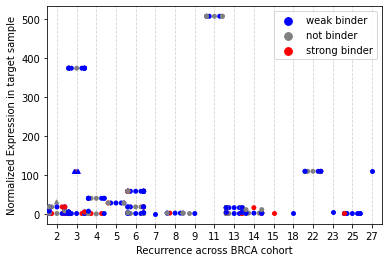

In [266]:
# markers = ['^', 'o', 's', 'X', 'd']
# all_tmp_plots = []
# for idx, sample in enumerate(samples):
#     print(sample)
#     sample_short = ''.join(sample.split('.')[:-1])
#     sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
#     sample_nice = '_'.join(sample_short.split('-')[0:3])
#     sample_pool = sample.replace('-', '').replace('.', '')

#     tmp_plot = tmp.loc[(tmp['sample'] == sample_pool) &
#                        (tmp[sample_pool] > 0 ), :]
#     new_name = 'MHC-I binding status {}'.format('')
#     tmp_plot = tmp_plot.rename({'MHC-I binding status':
#                                new_name}, axis = 1)
    
#     all_tmp_plots.append(tmp_plot)
#     print(tmp_plot.shape)
#     if len(tmp_plot):
#         ax = sns.swarmplot(data = tmp_plot, x = 'recurrence', y = sample_pool, 
#                         hue = new_name, marker = markers[idx], 
#                           # jitter = 2
#                           palette = ['b', 'grey', 'r'])



# plt.xlabel('Recurrence across BRCA cohort')
# plt.ylabel('Normalized Expression in target sample')
# #plt.yscale("log")  
# # plt.grid(True, which='both', color='lightgrey')
# ax.xaxis.grid(color='lightgrey', linestyle='dashed', which='both')
# #plt.ylim([0.1, max(tmp[sample])])
# #plt.xlim([0, 30])
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[:3], labels[:3])
    
# save = True
# suffix = 'recurrence_expression_binding'
# save_path = os.path.join(plot_dir, f'{base_plot}_{suffix}.pdf')
# if save:
#     print("save to {}".format(save_path))
#     plt.savefig(save_path, bbox_inches='tight')
# plt.show()

<AxesSubplot:xlabel='recurrence', ylabel='TCGAC8A12P01A11RA11507all'>

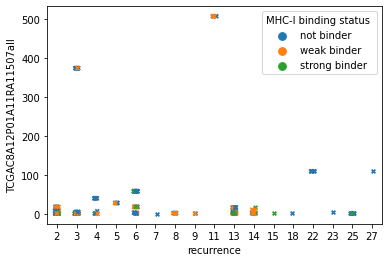

In [249]:
# sns.stripplot(data = all_tmp_plots[0], x = 'recurrence', y = sample_pool, 
#                     hue = 'MHC-I binding status ', marker = 'X')
# # sns.stripplot(data = all_tmp_plots[1], x = 'recurrence', y = sample_pool, 
# #                     hue = 'MHC-I binding status ', marker = '^')
# # sns.stripplot(data = all_tmp_plots[2], x = 'recurrence', y = sample_pool, 
# #                     hue = 'MHC-I binding status ', marker = '^')